This competition is based on cifar100 dataset for object classification.
It has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class.

See this link for details about different categories.
https://www.cs.toronto.edu/~kriz/cifar.html

Note that:
- Test set and label are provided. Generally test set label are not given in a competition.


Rule:
 - Given that we are unable to cover deep learning in any depth during the quarter, you can't use any deep learning based method in this competition.
 - You have to report accuracy,  f1 score and confusion matrix in this classification challenge.
 - (4 points) First method is based on the models you already build in this class,  QDA and multiclass logistic regression etc. You can also use PCA/LDA for dimensionality reduction too before building the classifier. You are free to copy paste your solution code from homeworks.
 - (4 points)Second method is based on sklearn library. You are free to choose any method.
 
 
 Note that you need to split data into train and validation set for tunning any hyper parameter.
 We did tunning of hyper-parameter $\lambda$ in ridge regression homework.
 
 If your best accuracy score fall into into
  - top 40% you will get 1 extra point.
  - between top 40% and 80% .5 extra point
  
  
  # Distribution of 4 points for each method
  - 1 points code correctness in each method.
  - 1 point right tunning of hyper parameters using validation set(model selection).
  - 1 Correctness of overall code.
  - 1 point reporting the accuracy and f1 score on test set and confusion matrix interpretation.
  

# Here is sample starter code and results based on MultinomialNB. I didn't tune hyper parameter in the provide sample.

In [1]:
import numpy as np

In [2]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Using TensorFlow backend.


In [3]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Let's convert images to gray scale and plot some of them. You are supposed to work with gray scale images.

In [4]:
from skimage.color import rgb2gray

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x_train_data= np.zeros((50000, 32, 32))

In [7]:
for i, x in enumerate(x_train):
  x_train_data[i] = rgb2gray(x)
  

In [8]:
x_test_data= np.zeros((10000, 32, 32))
for i, x in enumerate(x_test):
  x_test_data[i] = rgb2gray(x)

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


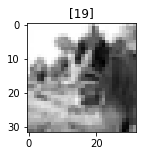

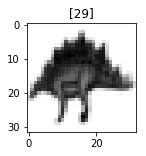

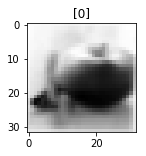

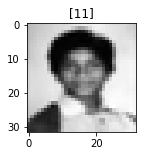

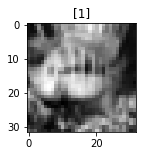

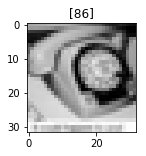

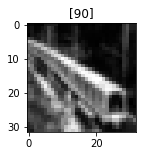

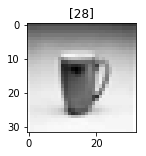

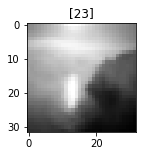

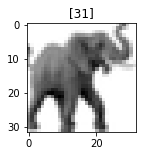

In [9]:
for i in range(10):
  plt.figure(figsize= (2,2))
  plt.imshow(x_train_data[i], cmap='gray')
  plt.title(y_train[i])
  plt.show()


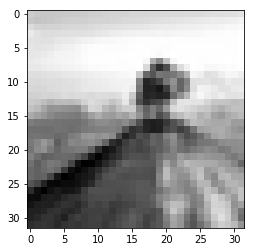

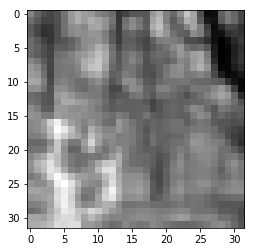

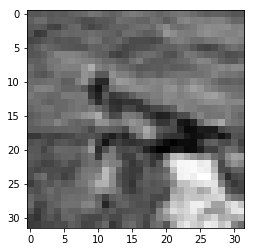

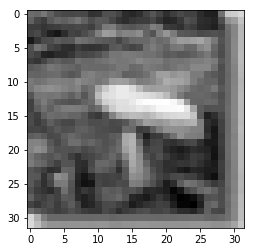

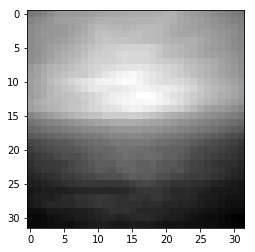

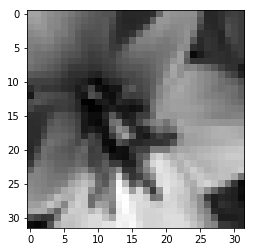

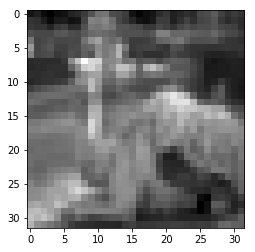

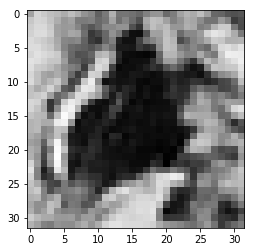

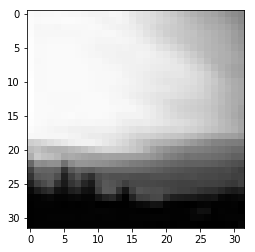

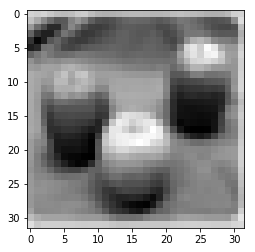

In [10]:
for i in range(10):
  plt.imshow(x_test_data[i], cmap='gray')
  plt.show()

Let's convert them to vector

In [11]:
x_train_data = x_train_data.reshape((50000, -1))

In [12]:
x_test_data = x_test_data.reshape((10000, -1))

In [13]:
print(x_train_data.shape, x_test_data.shape)

(50000, 1024) (10000, 1024)


In [14]:
from sklearn.naive_bayes import  MultinomialNB

In [15]:
mlnb = MultinomialNB()

In [16]:
mlnb.fit(x_train_data, y_train.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
y_test_pred = mlnb.predict(x_test_data)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [19]:
print(accuracy_score(y_test_pred, y_test))

0.0724


# Write code for first method based on the work done in the class. You can't use any machine learning library. Use the classes or method we build in this course.

The dimensions need to be reduced, so trying out Dimensionality reduction techniques - PCA, LDA

In [62]:
#PCA implementation
#Vectorizing and centralizing the data
mu = np.mean(x_train_data, axis=0)
X_c = x_train_data - mu
print(X_c.shape)

(50000, 1024)


In [63]:
U, E, VT = np.linalg.svd(X_c, full_matrices=False)

In [64]:
U.shape, E.shape, VT.shape

((50000, 1024), (1024,), (1024, 1024))

In [65]:
relative_variance_capture =  np.cumsum(np.square(E))/np.sum(np.square(E))

In [83]:
per_var = relative_variance_capture[-1] * 0.86
reduced_dim = np.where(relative_variance_capture >= per_var)[0][0]

#reduced_dim = np.where(relative_variance_capture >= 0.96)[0][0]
reduced_dim

37

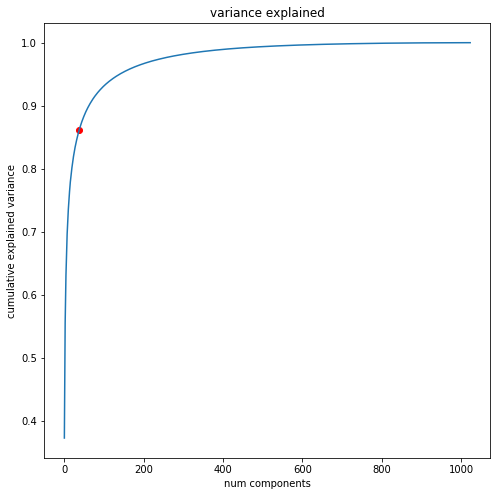

In [84]:
plt.figure(figsize=(8,8))

plt.plot(reduced_dim, relative_variance_capture[reduced_dim]/relative_variance_capture[-1], 'ro')
plt.plot(relative_variance_capture/relative_variance_capture[-1])
plt.title('variance explained')
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')
plt.show()

In [85]:
pca_X = np.dot(X_c, VT.T[:, :reduced_dim])
xct = x_test_data - np.mean(x_test_data, axis = 0)
pca_test_X = np.dot(xct, VT.T[:, :reduced_dim])

In [86]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

# Logistic Regression without sklearn

In [87]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [88]:
mod = OneHotEncoder().fit(y_train)
y_train_data = mod.transform(y_train).toarray()
y_test_data = mod.transform(y_test).toarray()
pca_X = np.asmatrix(pca_X)
pca_test_X = np.asmatrix(pca_test_X)
print(pca_test_X.shape)
print(y_train_data.shape)

(10000, 37)
(50000, 100)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [89]:
NUM_CLASSES = y_train_data.shape[1]

X =  tf.placeholder(tf.float32, [None, reduced_dim])
Y = tf.placeholder(tf.float32, [None, NUM_CLASSES])
print(X.shape, Y.shape)

(?, 37) (?, 100)


In [90]:

with tf.variable_scope("multi_class_logistic_model", reuse=tf.AUTO_REUSE):
    W = tf.get_variable('Weight_matrix', initializer = tf.random_normal(shape = (reduced_dim, NUM_CLASSES)))    
    W_o= tf.get_variable('W0_matrix', initializer = tf.zeros([NUM_CLASSES,1]))
    print(X.shape, W.shape, W_o.shape)
    # we have to do X traspose as examples are along the row and we need them along columns

    Y_pred = tf.matmul(tf.transpose(W), tf.transpose(X))  + W_o
    
print('shape of prediction vector is {}'.format(Y_pred.shape))

(?, 37) (37, 100) (100, 1)
shape of prediction vector is (100, ?)


In [91]:
Y_pred = tf.transpose(Y_pred)
print('shape of prediction vector is {}'.format(Y_pred.shape))
Y_pred_prob = tf.nn.softmax(Y_pred)
print("Shape of Y_pred_prob")
print(Y_pred_prob.shape)
ypredicted = tf.math.argmax(Y_pred_prob,1)
print('shape of predicted vector is {}'.format(Y_pred_prob.shape))

shape of prediction vector is (?, 100)
Shape of Y_pred_prob
(?, 100)
shape of predicted vector is (?, 100)


In [92]:
loss = -tf.math.reduce_mean(tf.linalg.tensor_diag_part(tf.matmul(Y, tf.transpose(tf.math.log(Y_pred_prob)))))
pred_y = tf.math.argmax(Y_pred_prob, axis = 1)
check = tf.math.equal(pred_y, tf.math.argmax(Y, axis = 1))
accuracy = tf.math.reduce_mean(tf.dtypes.cast(check, tf.float32))
accuracy.get_shape()

TensorShape([])

In [93]:
opt = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [94]:
BATCH_SIZE = 100
NUM_EPOCHS = 20

In [95]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for eidx in range(NUM_EPOCHS):
        epoch_acc, epoch_loss = [], []
        for bidx in range(pca_X.shape[0]// BATCH_SIZE):
          start = bidx * BATCH_SIZE
          xs, ys = pca_X[start : start + BATCH_SIZE, : ],y_train_data[start : start + BATCH_SIZE, : ]
          _, train_loss, train_acc= sess.run([opt, loss, accuracy], feed_dict = {X:xs, Y:ys})    ### Write your code here
          if (bidx+1)%100 == 0:
              print('epoch {} training batch {} loss {} accu {}'.format(eidx +1 , bidx +1, train_loss, train_acc))
          epoch_acc.append(train_acc)
          epoch_loss.append(train_loss)
        print('##################################')
        val_loss, val_acc= sess.run([loss, accuracy],feed_dict = {X:pca_test_X, Y:y_test_data})
        print('epoch {} # test accuracy {} $ test loss {}'.format(eidx +1, val_acc, val_loss ))
        print('##################################') 
        # Let keep epoch level values for plotting
        train_losses.append(np.mean(epoch_loss))
        train_accuracies.append(np.mean(epoch_acc))
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

epoch 1 training batch 100 loss 8.57666301727295 accu 0.019999999552965164
epoch 1 training batch 200 loss 7.397863864898682 accu 0.03999999910593033
epoch 1 training batch 300 loss 6.515039443969727 accu 0.03999999910593033
epoch 1 training batch 400 loss 5.834508895874023 accu 0.029999999329447746
epoch 1 training batch 500 loss 5.530388355255127 accu 0.05000000074505806
##################################
epoch 1 # test accuracy 0.045899998396635056 $ test loss 5.515614032745361
##################################
epoch 2 training batch 100 loss 5.147604942321777 accu 0.07000000029802322
epoch 2 training batch 200 loss 5.085608959197998 accu 0.029999999329447746
epoch 2 training batch 300 loss 4.906153678894043 accu 0.05999999865889549
epoch 2 training batch 400 loss 4.635725021362305 accu 0.10000000149011612
epoch 2 training batch 500 loss 4.607627868652344 accu 0.05000000074505806
##################################
epoch 2 # test accuracy 0.06880000233650208 $ test loss 4.6392669677

epoch 16 # test accuracy 0.09229999780654907 $ test loss 4.223315715789795
##################################
epoch 17 training batch 100 loss 4.217230319976807 accu 0.07999999821186066
epoch 17 training batch 200 loss 4.299962997436523 accu 0.05999999865889549
epoch 17 training batch 300 loss 4.1405792236328125 accu 0.09000000357627869
epoch 17 training batch 400 loss 3.9913177490234375 accu 0.11999999731779099
epoch 17 training batch 500 loss 4.216123580932617 accu 0.10000000149011612
##################################
epoch 17 # test accuracy 0.09239999949932098 $ test loss 4.223320484161377
##################################
epoch 18 training batch 100 loss 4.2171831130981445 accu 0.07999999821186066
epoch 18 training batch 200 loss 4.299923896789551 accu 0.05999999865889549
epoch 18 training batch 300 loss 4.140503406524658 accu 0.09000000357627869
epoch 18 training batch 400 loss 3.9912242889404297 accu 0.11999999731779099
epoch 18 training batch 500 loss 4.216119766235352 accu 0

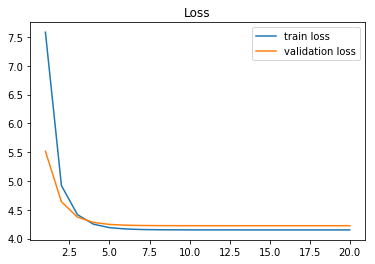

In [96]:
plt.plot(range(1, NUM_EPOCHS+1),  train_losses)
plt.plot(range(1, NUM_EPOCHS+1),  val_losses)
plt.title("Loss")
plt.legend(['train loss','validation loss'])
plt.show()

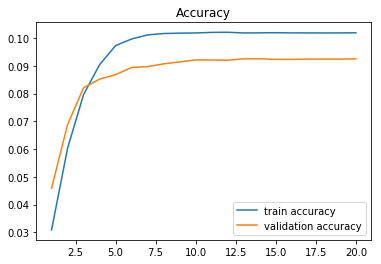

In [97]:
plt.plot(range(1, NUM_EPOCHS+1),  train_accuracies)
plt.plot(range(1, NUM_EPOCHS+1),  val_accuracies)
plt.title("Accuracy")
plt.legend(['train accuracy','validation accuracy'])
plt.show()

In [98]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ypred = sess.run([ypredicted], feed_dict = {X:pca_test_X})

In [99]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print(accuracy_score( y_test.ravel(),ypred[0]))
print(f1_score(y_test.ravel(),ypred[0],average='weighted'))
print(confusion_matrix(y_test.ravel(), ypred[0]))

0.0082
0.006259998981856051
[[0 1 0 ... 0 7 0]
 [0 0 4 ... 0 0 2]
 [1 0 0 ... 0 2 3]
 ...
 [0 1 2 ... 0 2 7]
 [0 1 1 ... 0 1 5]
 [1 0 1 ... 0 0 1]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Write code for second method based on sklearn library.

In [53]:
from sklearn.decomposition import PCA as PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [54]:
U, E, VT = np.linalg.svd((x_train_data-np.mean(x_train_data,axis=0)), full_matrices=False)
relative_variance_capture =  np.cumsum(np.square(E))/np.sum(np.square(E))
per_var = relative_variance_capture[-1] * 0.86
reduced_dim = np.where(relative_variance_capture >= per_var)[0][0]
#reduced_dim = np.where(relative_variance_capture >= 0.96)[0][0]
print(reduced_dim)
pca=PCA(n_components = reduced_dim)
pca_X = pca.fit_transform(x_train_data)
pca_test_X = pca.transform(x_test_data)
print(pca_X.shape)

37
(50000, 37)


In [97]:
"""
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
    
"""

In [ ]:
# svc_param_selection(pca_X, y_train.ravel(), 5)

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(pca_X, y_train.ravel())
CV_rfc.best_params_
"""

In [ ]:
"""
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(pca_X, y_train.ravel())
pred=rfc1.predict(pca_test_X)
"""

Now since the dimensions are educed, the next task is clasification.

# RANDOM FOREST CLASSIFIER - 19.12% accuracy

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 300, max_features = 'auto')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)
print(clf.score(pca_test_X, y_test))
print(f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test.ravel(), y_pred))

0.1912
0.17736386991952724
[[36  4  0 ...  1  0  0]
 [ 0 44  0 ...  3  1  0]
 [ 0  1 12 ...  1  3  2]
 ...
 [ 1  6  1 ... 19  0  2]
 [ 1  0  3 ...  2  7  3]
 [ 0  0  1 ...  1  0 34]]


Random Forest Classifier yields an accuracy of 19.12% with 300 estimators.

# Support Vector Machines - 18.04% accuracy

In [60]:
from sklearn import svm

In [61]:
svm_pca = svm.SVC()
svm_pca.fit(pca_X, y_train.ravel())
pred = svm_pca.predict(pca_test_X)
print(svm_pca.score(pca_test_X, y_test))
print(f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test.ravel(), pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.1804
0.17335482208734562
[[33  2  1 ...  0  0  1]
 [ 0 36  0 ...  4  1  0]
 [ 1  2  7 ...  2  5  4]
 ...
 [ 1  4  2 ... 23  1  1]
 [ 1  1  3 ...  4  9  2]
 [ 0  0  0 ...  0  2 31]]


Support Vector Machines yield an accuracy of 18.04% as another alternative and takes lesser time to run than Random Forests.

# Rough work

In [ ]:
#FISHER LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver = 'svd')
X_lda = lda.fit_transform(x_train_data, y_train.ravel())
X_lda_test = lda.transform(x_test_data)
print(X_lda.shape)
print(X_lda_test.shape)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
fisher_lda = LDA(solver = 'eigen')
lda_X = lda.fit(x_train_data, y_train.ravel())
fisher_lda_X = lda_X.transform(x_train_data)
fisher_lda_test_X = lda_X.transform(x_test_data)
print(fisher_lda_X.shape)
print(fisher_lda_test_X.shape)

In [ ]:
#Quadratic Discriminant Analysis

In [ ]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda_X = qda.fit(x_train_data, y_train.ravel())
qda_test_X = qda_X.predict(x_test_data)
#print(np.unique(qda_test_X, return_counts=True))
#print(confusion_matrix(qda_test_X, y_test))
#print(classification_report(y_test, qda_test_X, digits=3))

In [ ]:
#Support Vector Machines

In [ ]:
svm_pca_poly = svm.SVC(kernel = 'poly', degree = 8)
svm_pca_poly.fit(pca_X, y_train.ravel())
print(svm_pca_poly.score(pca_test_X, y_test))

In [ ]:
svm_pca_rbf = svm.SVC(kernel = 'rbf')
svm_pca_rbf.fit(pca_X, y_train.ravel())
print(svm_pca_rbf.score(pca_test_X, y_test))

In [ ]:
svm_pca_sig = svm.SVC(kernel = 'sigmoid')
svm_pca_sig.fit(pca_X, y_train.ravel())
pred = svm_pca_sig.predict(pca_test_X)
print(svm_pca_sig.score(pca_test_X, y_test))

In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
detree = DecisionTreeClassifier()
detree = detree.fit(pca_X, y_train.ravel())
pred = detree.predict(pca_test_X)
accuracy = metrics.accuracy_score(y_test, pred)
print(accuracy)
print(detree.score(pca_test_X, y_test))



In [ ]:
#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model_pca = LogisticRegression(solver='saga').fit(pca_X, y_train.ravel())
print(log_model_pca.score(pca_test_X, y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_model_pca = LogisticRegression(solver='lbfgs').fit(pca_X, y_train.ravel())
pred = log_model_pca.predict(pca_test_X)
print(log_model_pca.score(pca_test_X, y_test))

In [ ]:
#K NEAREST NEIGHBOURS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(pca_X, y_train.ravel())

#Predict the response for test dataset
y_pred = knn.predict(pca_test_X)
print(knn.score(pca_test_X, y_test))




In [ ]:
#LINEAR DISCRIMINANT ANALYSIS CLASSIFIER

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_class_model = LDA(solver = 'svd')
lda_class_model.fit(pca_X, y_train.ravel())
lda_class_model_pred = lda_class_model.predict(pca_test_X)

print(lda_class_model.score(pca_test_X, y_test))
print(f1_score(y_test, lda_class_model_pred, average='weighted'))
print(confusion_matrix(y_test.ravel(), lda_class_model_pred))
#print(confusion_matrix(y_test.ravel(),ypred[0]))
#print(classification_report(y_test, lda_class_model_pred, digits=3))


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_class_model_fisher = LinearDiscriminantAnalysis()
lda_class_model_fisher.fit(X_lda,y_train.ravel())
lda_class_model_fisher_pred = lda_class_model_fisher.predict(X_lda_test)
print(lda_class_model_fisher.score(X_lda_test,y_test))
print(f1_score(y_test,lda_class_model_fisher_pred, average='weighted'))
print(confusion_matrix(y_test.ravel(), lda_class_model_pred))

In [ ]:
#Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)
print(clf.score(pca_test_X, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 400, max_features = 'auto')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)
print(clf.score(pca_test_X, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)

print(clf.score(pca_test_X, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 250)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)

accuracy = metrics.accuracy_score(y_test, pred)
print(accuracy)
print(clf.score(pca_test_X, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)
print(clf.score(pca_test_X, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 500, max_features = 'auto')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)
print(clf.score(pca_test_X, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators = 1000, max_features = 'auto')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(pca_X, y_train.ravel())

y_pred = clf.predict(pca_test_X)
print(clf.score(pca_test_X, y_test))